- age : age in years
- sex
- bmi : body mass index
- bp : average blood pressure
- s1 tc : total serum cholesterol
- s2 ldl : low-density lipoproteins
- s3 hdl : high-density lipoproteins
- s4 tch : total cholesterol / HDL => 증가할수록 심혈관질환 발생빈도 증가 (보통 수치가 3 ~ 7 정도로 나옴)
- s5 ltg : possibly log of serum triglycerides level
- s6 glu : blood sugar level

### 전처리            
- 이상치를 제거하니까 score 값이 감소했다. 왜그럴까?? => 무조건 제거하면 안된다! 데이터를 보고 제거를 할지, 아님 따로 빼서 다른 모델로 따로 만들지, 아님 다른 값으로 대체할지 등등 여러 방법이 있다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [3]:
file = '../data/diabetes.csv'
data = pd.read_csv(file, index_col = [0])
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
data.isna().sum()
#결측치 없음

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [5]:
data.duplicated().sum()
# 중복값 없음

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 41.4 KB


In [7]:
data.columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'target']
data

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [8]:
result = data.corr()
result

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
tc,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
ltg,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
glu,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [9]:
result['target']

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
tc        0.212022
ldl       0.174054
hdl      -0.394789
tch       0.430453
ltg       0.565883
glu       0.382483
target    1.000000
Name: target, dtype: float64

In [10]:
result['target'].abs().sort_values(ascending=False)
# 상관관계를 분석하니 bmi와 ltg가 가장 높은 상관관계를 보였다. 이걸 시각화로도 확인해보자

target    1.000000
bmi       0.586450
ltg       0.565883
bp        0.441482
tch       0.430453
hdl       0.394789
glu       0.382483
tc        0.212022
age       0.187889
ldl       0.174054
sex       0.043062
Name: target, dtype: float64

442


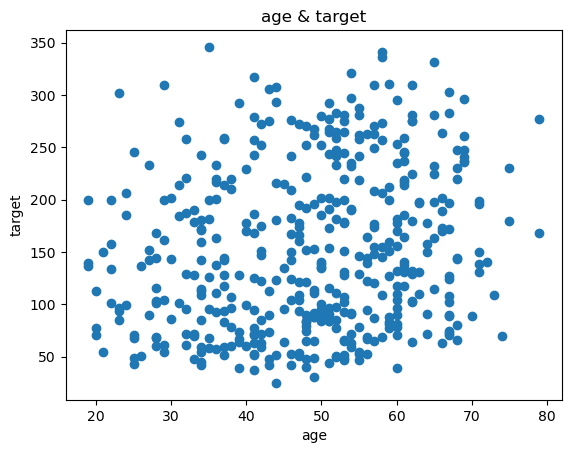

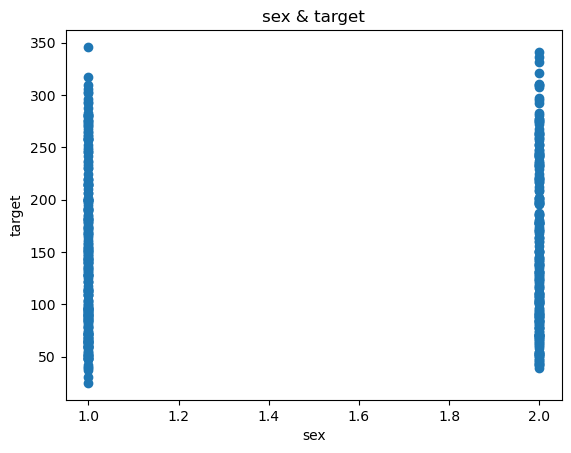

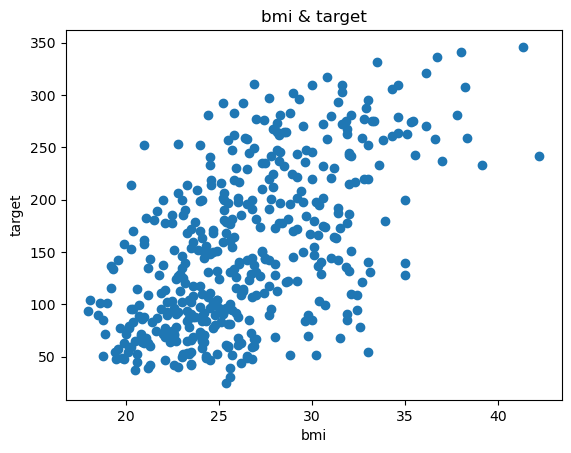

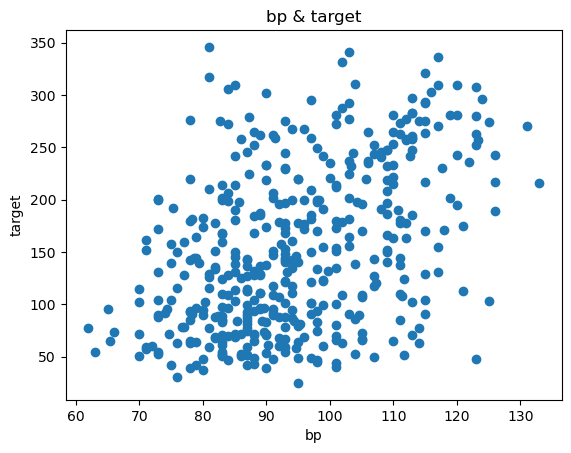

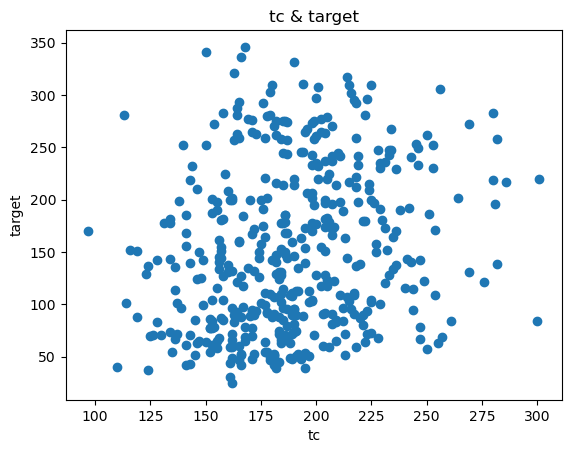

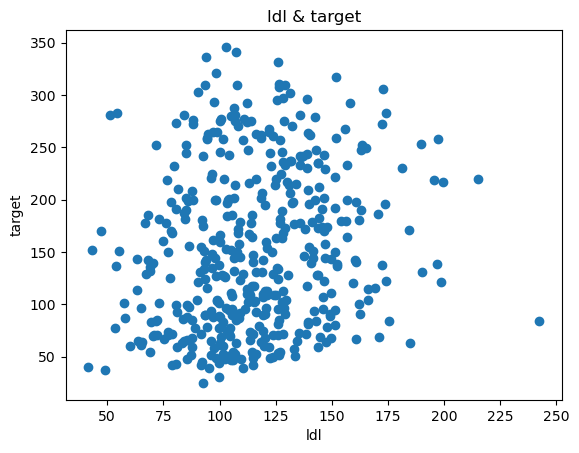

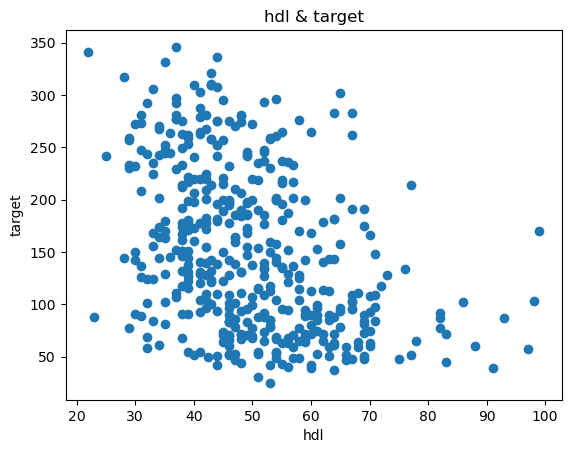

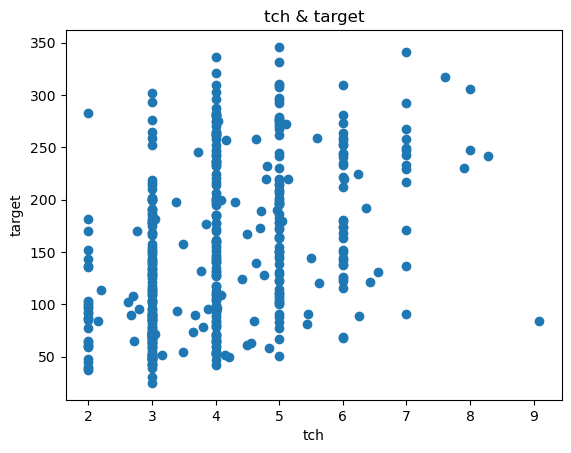

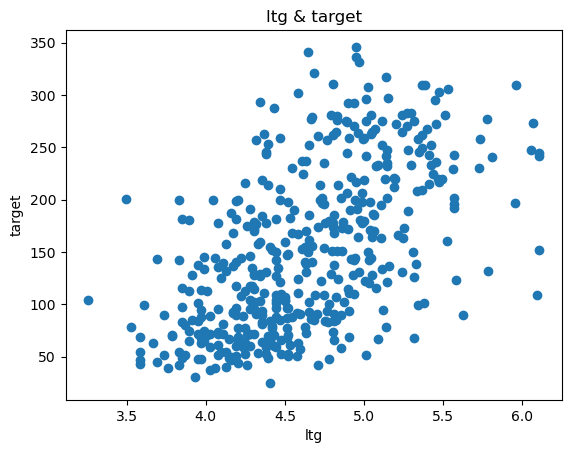

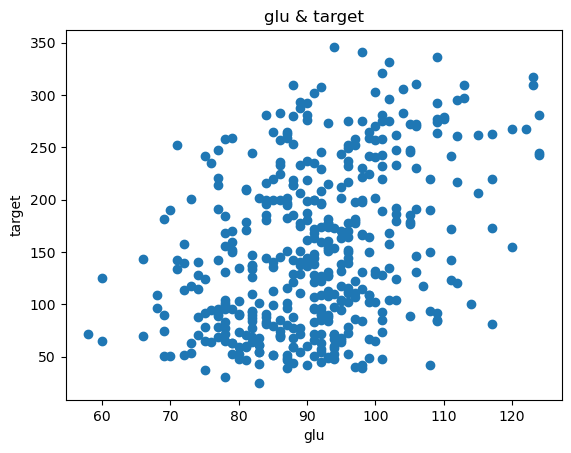

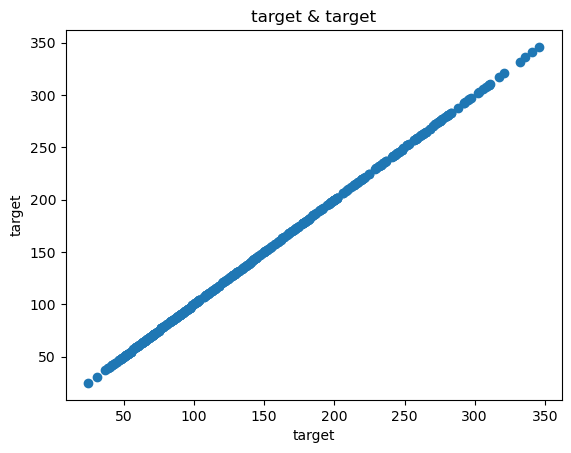

In [11]:
# for i in data.columns:
#     y_list = data[i]
#     print(y_list)
low_num = data.shape[0]

target_list = []
for i in range(low_num):
    target_list.append(data['target'][i])
#print(target_list)
print(len(target_list))

for col in data.columns:
    for_data = data[col]
    x_list = []
    for i in range(low_num):
        x_list.append(for_data[i])
    plt.scatter(x_list, target_list)
    plt.xlabel(col)
    plt.ylabel('target')
    plt.title(f"{col} & target")
    plt.show()

# 시각화를 해보니 상관성이 보인다. 그래서 bmi, ltg를 피쳐로 하기로 결정했다.

In [12]:
use_data = data[['bmi','ltg','target']]
use_data

,bmi,ltg,target
0,32.1,4.8598,151
1,21.6,3.8918,75
2,30.5,4.6728,141
3,25.3,4.8903,206
4,23.0,4.2905,135
...,...,...,...
437,28.2,4.9836,178
438,24.9,4.4427,104
439,24.9,4.1271,132
440,30.0,5.1299,220


### 피처, 타겟 분리

In [13]:
featureDF = use_data[['bmi','ltg']]
featureDF.head()

,bmi,ltg
0,32.1,4.8598
1,21.6,3.8918
2,30.5,4.6728
3,25.3,4.8903
4,23.0,4.2905


In [14]:
targetDF = use_data['target']
targetDF.head()

0    151
1     75
2    141
3    206
4    135
Name: target, dtype: int64

### 학습/테스트 데이터셋 분리
- 학습 : 테스트 = 80:20

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size = 0.2, random_state = 75)

In [17]:
# 학습 및 테스트 데이터셋 확인
print('학습용 데이터 셋')
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")
print('테스트용 데이터 셋')
print(f"X_test.shape: {X_test.shape} \ny_test.shape: {y_test.shape}")

학습용 데이터 셋
X_train.shape: (353, 2) 
y_train.shape: (353,)
테스트용 데이터 셋
X_test.shape: (89, 2) 
y_test.shape: (89,)


### 피처 스케일링

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(353, 2)

In [22]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(89, 2)

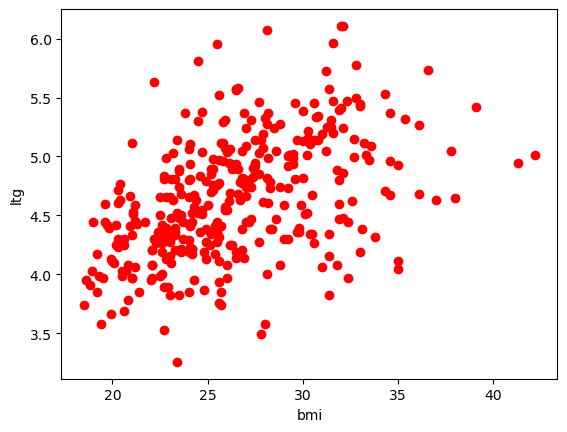

In [23]:
# 피쳐 스케일링이 제대로 되었는지 시각화 해보자
# 원본 데이터 시각화
plt.scatter(X_train['bmi'], X_train["ltg"], c='red')
plt.xlabel('bmi')
plt.ylabel('ltg')
plt.show()

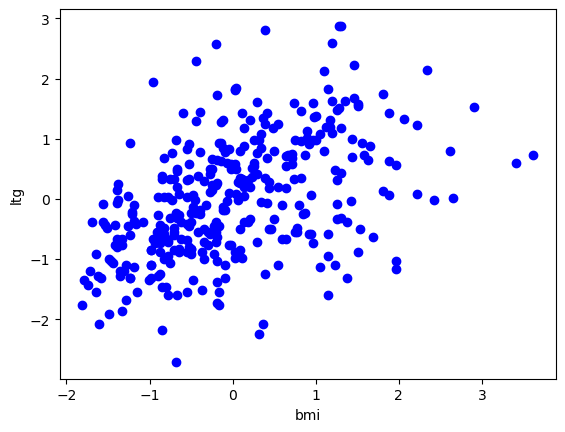

In [24]:
# 스케일링 된 데이터 시각화
plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1], c = 'blue')
plt.xlabel('bmi')
plt.ylabel('ltg')
plt.show()

# 스케일링이 잘 된것을 확인하였다.

### 학습

In [25]:
max_k = scaled_X_train.shape[0]
max_k

353

In [26]:
train_scoreList = []
test_scoreList = []
for k in range(1, max_k):
    #학습 진행
    sample_model = KNeighborsRegressor(n_neighbors = k)
    sample_model.fit(scaled_X_train, y_train)
    # 검사
    train_scoreList.append(sample_model.score(scaled_X_train, y_train))
    test_scoreList.append(sample_model.score(scaled_X_test, y_test))

# 전체 점수 리스트 확인
print(f"Train score : \n{train_scoreList}")
print(f"Test score : \n{test_scoreList}")

Train score : 
[0.9914700099626836, 0.7440291997509965, 0.6387971553054257, 0.609353603772608, 0.594553310047081, 0.5635970629357894, 0.5425558373100534, 0.5319617844680513, 0.5234031490109295, 0.515022557392393, 0.5077262216710956, 0.4969983872415361, 0.49722026294253185, 0.4982281950908535, 0.492134293331682, 0.4883723573886466, 0.4819645464482001, 0.4802016023765058, 0.48658731652594267, 0.48250892546585067, 0.4809153146804235, 0.47469520703752555, 0.4700274501656031, 0.4663781934145105, 0.46705205864707167, 0.46673120813242586, 0.468045155343045, 0.4650782867174199, 0.4611338351872466, 0.4607447922350575, 0.4606494141077454, 0.4596429703035928, 0.45972481311449076, 0.45744453225284476, 0.45779736732000575, 0.45317983360704817, 0.4504851113973851, 0.450257749613615, 0.4516333916005134, 0.44904562175183194, 0.44700354161607303, 0.44617719256815724, 0.4455399575819057, 0.4444141488503026, 0.4429738352741954, 0.44053797129748584, 0.4385282832298807, 0.43865534680132734, 0.4371351379900

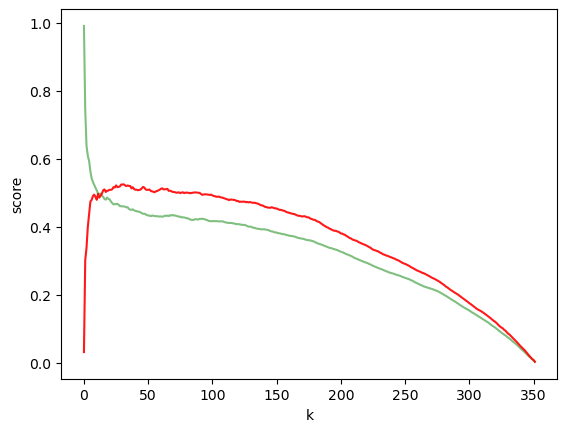

In [27]:
plt.plot(train_scoreList, color = 'green', alpha = 0.5)
plt.plot(test_scoreList, color = 'red', alpha = 0.9)
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [28]:
max_k = test_scoreList.index(max(test_scoreList)) + 1
# +1을 해주어야 한다. 인덱스는 0에서 시작하니까
max_k

32

In [29]:
model = KNeighborsRegressor(n_neighbors = max_k)
model

KNeighborsRegressor(n_neighbors=32)

In [30]:
model.fit(scaled_X_train, y_train)

KNeighborsRegressor(n_neighbors=32)

In [31]:
# 점수 확인
result_train = model.score(scaled_X_train, y_train)
result_train

0.4596429703035928

In [32]:
result_test = model.score(scaled_X_test, y_test)
result_test

0.5252592916856451

###### 훈련점수와 테스트점수가 유사하므로 최적적합이라고 할수있겠다.

#### 예측

In [33]:
y_pred = model.predict(scaled_X_test)
y_pred
#예측값이 나옴

array([226.53125, 164.03125, 208.28125, 153.90625, 161.5    ,  83.15625,
       221.8125 , 112.90625, 120.875  ,  84.75   , 173.71875, 124.8125 ,
       170.90625, 177.875  , 116.09375, 150.84375, 204.25   , 191.71875,
       108.65625, 113.78125, 175.71875, 104.5625 ,  97.65625, 112.78125,
       111.09375, 180.84375, 153.09375, 219.5625 , 220.59375,  83.59375,
       122.     , 191.59375, 130.3125 , 105.5    , 102.90625, 236.96875,
       241.15625, 210.1875 , 213.90625, 219.375  , 140.90625, 146.71875,
        80.90625, 123.25   , 116.28125,  89.78125,  87.46875, 160.40625,
        94.9375 , 175.90625, 198.1875 ,  82.4375 , 150.15625, 151.15625,
       113.03125, 136.0625 , 186.65625, 100.75   , 121.125  ,  96.8125 ,
        87.46875, 250.6875 , 172.875  , 114.28125, 210.9375 ,  85.40625,
       163.6875 , 123.46875, 243.71875, 205.9375 ,  84.6875 , 107.25   ,
        82.84375, 125.625  , 190.     , 110.875  , 136.3125 , 175.28125,
       131.78125, 122.53125, 228.5625 ,  84.5    , 

In [34]:
y_pred = y_pred.round(0)
y_pred.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

#### 성능평가

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print('[ 모델설명도 ]')
print(f"설정계수값(R2) : {r2_score(y_test, y_pred)}")

# 처음에 테스트 데이터셋이 아닌 >>피쳐 데이터프레임 전체<<를 넣어버림! => 그래서 R2의 값이 마이너스의 값이 나옴 (잘못되었다는 예기)
# 그런데 R2의 값은 0~1 범위의 값이 나온다. 마이너스가 나왔다는 것은 무언가 잘못되었다는 이야기

print('[ 에러 ]')
print(f"평균제곱오차(MSE) : {mean_squared_error(y_test, y_pred)}")
print(f"평균절대값오차(MAE) : {mean_absolute_error(y_test, y_pred)}")